In [1]:
import pandas as pd

In [3]:
news = pd.read_csv('OnlineNewsPopularity.csv')

In [4]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
import matplotlib.pyplot as plt

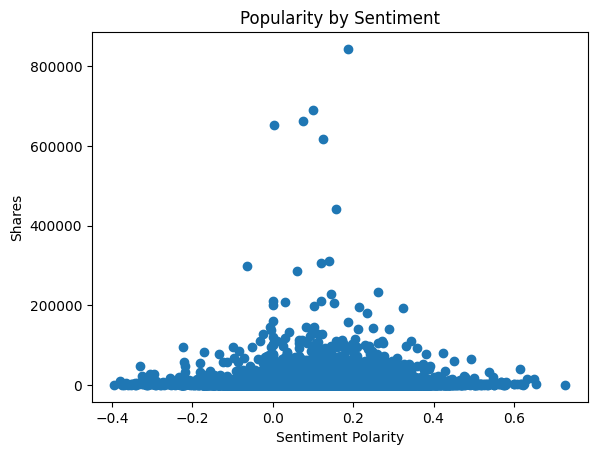

In [6]:
plt.scatter(news[' global_sentiment_polarity'], news[' shares'])
plt.title("Popularity by Sentiment")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Shares")
plt.show()

## Using Linear Regression as a Prediction Model

In [9]:
from sklearn.linear_model import LinearRegression
X = news[' global_sentiment_polarity'].values.reshape(-1,1)
y = news[' shares'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X,y)
print(regressor.coef_)
print(regressor.intercept_)

[[499.34840588]]
[3335.80329021]


In [11]:
regline = regressor.predict(X)

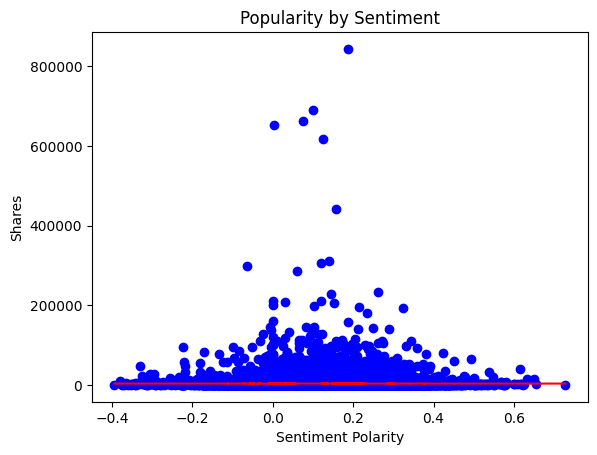

In [12]:
plt.scatter(news[' global_sentiment_polarity'], news[' shares'], color='blue')
plt.plot(sorted(news[' global_sentiment_polarity'].tolist()),regline, 'r')
plt.title("Popularity by Sentiment")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Shares")
plt.show()

## Implementing k-NN

In [48]:
k=15
newsentiment=0.5

In [49]:
# =news[' global_sentiment_polarity'].values.reshape(-1,1) would have been [[]] vs []

allsentiment=news[' global_sentiment_polarity'].tolist()
allshares=news[' shares'].tolist()

In [50]:
# show first 5 in list
allsentiment[:5]

[0.0925619834711,
 0.148947811448,
 0.323333333333,
 0.100704665705,
 0.281003475691]

In [51]:
# show first 5 in list
allshares[:5]

[593, 711, 1500, 1200, 505]

In [52]:
distances=[abs(x-newsentiment) for x in allsentiment]

In [53]:
import numpy as np

In [54]:
# idx is short for index. this pull the index values out of the distances list
idx = np.argsort(distances)

In [55]:
# shows the top 15 index values of the sorted distances list
# these are the 15 closest articles to the sentiment value 0.5 above
print(idx[0:k])

[30230 22546  7284 13035 29598 19361 36029 30670 25556  6744 26473  7211
  9200 15198 31496]


In [56]:
# Get the shared values of the top 15 nearest articles
nearbyshares = [allshares[i] for i in idx[0:k]]

In [57]:
# show the shared values of the top 15 nearest articles to the sentiment value of 0.5
print(nearbyshares)

[3200, 3600, 467, 784, 18500, 1600, 1100, 1300, 4900, 868, 6400, 575, 773, 64500, 1600]


In [58]:
# The final prediction of number of shares an article with a 0.5 sentiment value would have
# this is a mean of the top 15 nearest neighbors
print(np.mean(nearbyshares))

7344.466666666666


## Performing k-NN with Python's sklearn

In [59]:
from sklearn.neighbors import KNeighborsRegressor

In [60]:
X=np.array(allsentiment).reshape(-1,1)
y=np.array(allshares)

In [67]:
# Must add the n_neighbors value
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(X,y)

KNeighborsRegressor(n_neighbors=15)

In [68]:
print(knnregressor.predict(np.array([newsentiment]).reshape(-1,1)))

[7344.46666667]


## Using Other Supervised Learning Algorithms

In [81]:
X=np.array(allsentiment).reshape(-1,1)
y=np.array(allshares)

In [91]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)
print(regressor.predict(np.array([newsentiment]).reshape(-1,1)))

[3585.47749315]


In [92]:
#knn
from sklearn.neighbors import KNeighborsRegressor
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(X,y)
print(knnregressor.predict(np.array([newsentiment]).reshape(-1,1)))

[7344.46666667]


In [93]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(max_depth=3)
dtregressor.fit(X,y)
print(dtregressor.predict(np.array([newsentiment]).reshape(-1,1)))

[3978.70776621]


In [86]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(X,y)
print(rfregressor.predict(np.array([newsentiment]).reshape(-1,1)))

[4574.08299928]


In [87]:
#nueral network
from sklearn.neural_network import MLPRegressor
nnregressor = MLPRegressor()
nnregressor.fit(X,y)
print(dtregressor.predict(np.array([newsentiment]).reshape(-1,1)))

[3978.70776621]


C:\Users\timry\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Measuring Prediction Accuracy

In [76]:
P = np.array([allsentiment]).reshape(-1,1)

In [94]:
#linear regression MAE (mean absolute error)
allprediction=regressor.predict(P)
predictionerror=abs(allprediction-allsentiment)
print(np.mean(predictionerror))

3395.26087436506


In [95]:
#KNN MAE (mean absolute error)
allprediction=knnregressor.predict(P)
predictionerror=abs(allprediction-allsentiment)
print(np.mean(predictionerror))

3305.0234159854817


In [96]:
#Decision tree MAE (mean absolute error)
allprediction=dtregressor.predict(P)
predictionerror=abs(allprediction-allsentiment)
print(np.mean(predictionerror))

3395.26087436506


In [89]:
#Random forest MAE (mean absolute error)
allprediction=rfregressor.predict(P)
predictionerror=abs(allprediction-allsentiment)
print(np.mean(predictionerror))

3398.6244195840254


In [90]:
#Neural network MAE (mean absolute error)
allprediction=nnregressor.predict(P)
predictionerror=abs(allprediction-allsentiment)
print(np.mean(predictionerror))

3386.82225998383


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X=np.array(allsentiment).reshape(-1,1)
y=np.array(allshares)

In [99]:
trainingx, testx, trainingy, testy = train_test_split(X,y, random_state=1)

In [100]:
print(len(trainingx))

29733


In [102]:
print(len(trainingy))

29733


In [101]:
print(len(testx))

9911


In [103]:
print(len(testy))

9911


In [105]:
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)
print(np.mean(predictionerror))

3813.8570912000273


In [107]:
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(trainingx, trainingy)
predicted = knnregressor.predict(testx)
predicterror = abs(predicted-testy)
print(np.mean(predicterror))

3305.1753876164535


## Working with Multivariate Models

In [108]:
X=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(allshares)
trainingx, testx, trainingy, testy = train_test_split(X,y, random_state=1)
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)
print(np.mean(predictionerror))

3474.231759738627


## Using Classification Instead of Regression

In [128]:
themedian = np.median(news[' shares'])
news['abovemedianshares']=1*(news[' shares']>themedian)

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
X=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(news['abovemedianshares'])
trainingx, testx, trainingy, testy = train_test_split(X,y, random_state=1)
knnclassifier = KNeighborsClassifier(n_neighbors=15)
knnclassifier.fit(trainingx, trainingy)
predicted = knnclassifier.predict(testx)

In [131]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [132]:
print(confusion_matrix(testy, predicted))

[[2833 2150]
 [2539 2389]]


In [133]:
print(precision_score(testy, predicted))
print(recall_score(testy, predicted))

0.5263273848865389
0.48478084415584416
